In [20]:
!pip3 install matplotlib numpy
import matplotlib.pyplot as plt
import numpy as np

In [21]:
OM_t = lambda t: 6 * np.pi * t**2
dOM_t = lambda t: 12 * np.pi * t
ddOM_t = lambda t: 12 * np.pi
phi_t = lambda t: np.pi * t**3 / 6
dphi_t = lambda t: np.pi * t**2 / 2
ddphi_t = lambda t: np.pi * t

R = 18
O1O = O2A = 20


In [22]:
# first of all we can freely calculate at what time everything will finish
# half of length of cirle with radius R is pi*R
# so we need to find when OM_t will be equal to pi*R

t_last = np.sqrt(np.pi * R / (6 * np.pi))

t_last

1.7320508075688772

In [23]:
from dataclasses import dataclass


@dataclass
class State:
    t: float

    @property
    def phi(self):
        return phi_t(self.t)

    @property
    def pos_o1(self):
        return np.array([0, 0])

    @property
    def pos_o2(self):
        return np.array([R * 2, 0])

    @property
    def pos_a(self):
        return self.pos_o2 + O2A * np.array([np.cos(self.phi), np.sin(self.phi)])

    @property
    def pos_o(self):
        return self.pos_o1 + O1O * np.array([np.cos(self.phi), np.sin(self.phi)])

    @property
    def vel_o(self):
        return np.cross(np.array([0, 0, dphi_t(self.t)]), (self.pos_o))

    @property
    def acc_o_tan(self):
        return np.cross(np.array([0, 0, ddphi_t(self.t)]), (self.pos_o))

    @property
    def acc_o_norm(self):
        return np.cross(
            np.array([0, 0, dphi_t(self.t)]),
            np.cross(
                np.array([0, 0, dphi_t(self.t)]),
                (self.pos_o),
            ),
        )

    @property
    def acc_o(self):
        return self.acc_o_tan + self.acc_o_norm

    @property
    def theta(self):
        """
        angle of point M on OA axis
        """
        return OM_t(self.t) / R

    @property
    def dtheta(self):
        return dOM_t(self.t) / R

    @property
    def ddtheta(self):
        return ddOM_t(self.t) / R

    @property
    def pos_m(self):
        return (self.pos_o + self.pos_a) / 2 + R * np.array(
            [np.cos(self.theta), np.sin(self.theta)]
        )

    @property
    def vel_m_rel(self):
        # speed of point M relative to middle of the OA segment
        return np.cross(
            np.array([0, 0, self.dtheta]), (self.pos_m - (self.pos_o + self.pos_a) / 2)
        )

    @property
    def acc_m_rel_tan(self):
        return np.cross(
            np.array([0, 0, self.ddtheta]),
            (self.pos_m - (self.pos_o + self.pos_a) / 2),
        )

    @property
    def acc_m_rel_norm(self):
        return np.cross(
            np.array([0, 0, self.dtheta]),
            np.cross(
                np.array([0, 0, self.dtheta]),
                (self.pos_m - (self.pos_o + self.pos_a) / 2),
            ),
        )

    @property
    def acc_m_rel(self):
        return self.acc_m_rel_norm + self.acc_m_rel_tan

    @property
    def vel_m(self):
        return self.vel_m_rel + self.vel_o

    @property
    def acc_m(self):
        return self.acc_m_rel + self.acc_o

    def display(self, actors):
        actors["o1"].center = self.pos_o1[:2]
        actors["o2"].center = self.pos_o2[:2]
        actors["a"].center = self.pos_a[:2]
        actors["o"].center = self.pos_o[:2]
        actors["m"].center = self.pos_m[:2]
        actors["D"].center = (self.pos_o + self.pos_a) / 2
        actors["O1O"].set_data(
            x=self.pos_o1[0], y=self.pos_o1[1], dx=self.pos_o[0], dy=self.pos_o[1]
        )
        actors["O2A"].set_data(
            x=self.pos_o2[0],
            y=self.pos_o2[1],
            dx=self.pos_a[0] - self.pos_o2[0],
            dy=self.pos_a[1] - self.pos_o2[1],
        )

    def display_acc(self, actors):
        self.display(actors)
        actors["o_acc"].set_data(
            x=self.pos_o[0],
            y=self.pos_o[1],
            dx=self.acc_o[0],
            dy=self.acc_o[1],
        )
        actors["m_acc"].set_data(
            x=self.pos_m[0],
            y=self.pos_m[1],
            dx=self.acc_m[0],
            dy=self.acc_m[1],
        )
        actors["m_rel_acc"].set_data(
            x=self.pos_m[0],
            y=self.pos_m[1],
            dx=self.acc_m_rel[0],
            dy=self.acc_m_rel[1],
        )

    def display_vel(self, actors: dict):
        self.display(actors)
        actors["o_vel"].set_data(
            x=self.pos_o[0], y=self.pos_o[1], dx=self.vel_o[0], dy=self.vel_o[1]
        )
        actors["m_vel_rel"].set_data(
            x=self.pos_m[0],
            y=self.pos_m[1],
            dx=self.vel_m_rel[0],
            dy=self.vel_m_rel[1],
        )
        actors["m_vel"].set_data(
            x=self.pos_m[0], y=self.pos_m[1], dx=self.vel_m[0], dy=self.vel_m[1]
        )


In [24]:
states = [State(t) for t in np.linspace(0, t_last, 100)]

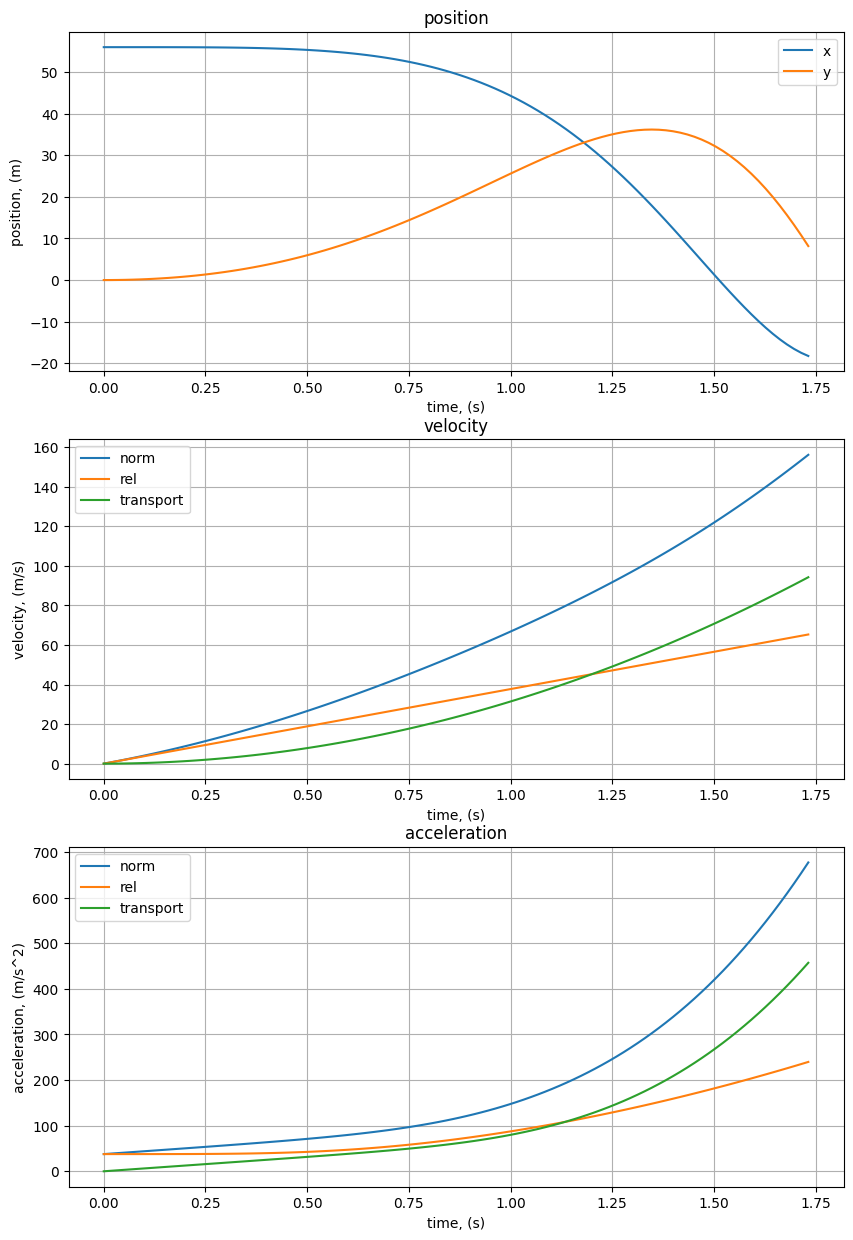

In [25]:
# show plots for position of M

fig, ax = plt.subplots(3, 1, figsize=(10, 15))
ax[0].set_title("position")
ax[1].set_title("velocity")
ax[2].set_title("acceleration")

t = np.linspace(0, t_last, 100)

ax[0].grid()
ax[0].set_xlabel("time, (s)")
ax[0].set_ylabel("position, (m)")
ax[0].plot(t, [state.pos_m[0] for state in states], label="x")
ax[0].plot(t, [state.pos_m[1] for state in states], label="y")
ax[0].legend()

ax[1].grid()
ax[1].set_xlabel("time, (s)")
ax[1].set_ylabel("velocity, (m/s)")
ax[1].plot(t, [np.linalg.norm(state.vel_m) for state in states], label="norm")
ax[1].plot(t, [np.linalg.norm(state.vel_m_rel) for state in states], label="rel")
ax[1].plot(t, [np.linalg.norm(state.vel_o) for state in states], label="transport")
ax[1].legend()

ax[2].grid()
ax[2].set_xlabel("time, (s)")
ax[2].set_ylabel("acceleration, (m/s^2)")
ax[2].plot(t, [np.linalg.norm(state.acc_m) for state in states], label="norm")
ax[2].plot(t, [np.linalg.norm(state.acc_m_rel) for state in states], label="rel")
ax[2].plot(t, [np.linalg.norm(state.acc_o) for state in states], label="transport")
ax[2].legend()


plt.show()


0
0
10
20
30
40
50
60
70
80
90
100
110
120
0


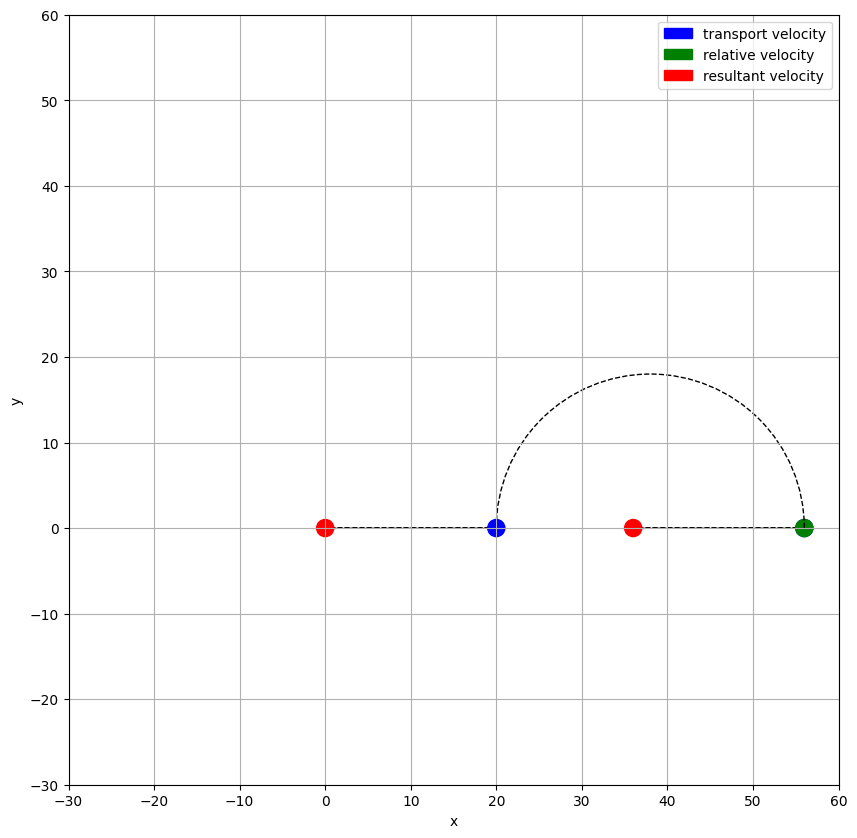

In [26]:
# create animation for t from 0 to t_last

import matplotlib.patches as p

states_anim = [State(t) for t in np.linspace(0, t_last, 100)]
states_anim.extend([states_anim[-1]] * 30)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-30, 60)
ax.set_ylim(-30, 60)
ax.set_aspect("equal")
ax.grid()

actors = {
    "o1": p.Circle(states_anim[0].pos_o1, 1, color="red"),
    "o2": p.Circle(states_anim[0].pos_o2, 1, color="red"),
    "a": p.Circle(states_anim[0].pos_a, 1, color="blue"),
    "o": p.Circle(states_anim[0].pos_o, 1, color="blue"),
    "m": p.Circle(states_anim[0].pos_m, 1, color="green"),
    "D": p.Arc((0, 0), 2 * R, 2 * R, theta1=0, theta2=180, linestyle="--"),
    "O1O": ax.arrow(0, 0, 0, 0, color="black", linestyle="--"),
    "O2A": ax.arrow(0, 0, 0, 0, color="black", linestyle="--"),
    "o_vel": ax.arrow(0, 0, 0, 0, color="blue", label="transport velocity"),
    "m_vel_rel": ax.arrow(0, 0, 0, 0, color="green", label="relative velocity"),
    "m_vel": ax.arrow(0, 0, 0, 0, color="red", label="resultant velocity"),
}
ax.add_patch(actors["o1"])
ax.add_patch(actors["o2"])
ax.add_patch(actors["a"])
ax.add_patch(actors["o"])
ax.add_patch(actors["m"])
ax.add_patch(actors["D"])
ax.legend()


def animate(i):
    if i % 10 == 0:
        print(i)
    state = states_anim[i]
    state.display_vel(actors)


from matplotlib.animation import FuncAnimation

anim = FuncAnimation(fig, animate, frames=len(states_anim), interval=1)
anim.save("task1_vel.gif")
plt.draw()
plt.show()


0
0
10
20
30
40
50
60
70
80
90
100
110
120
0


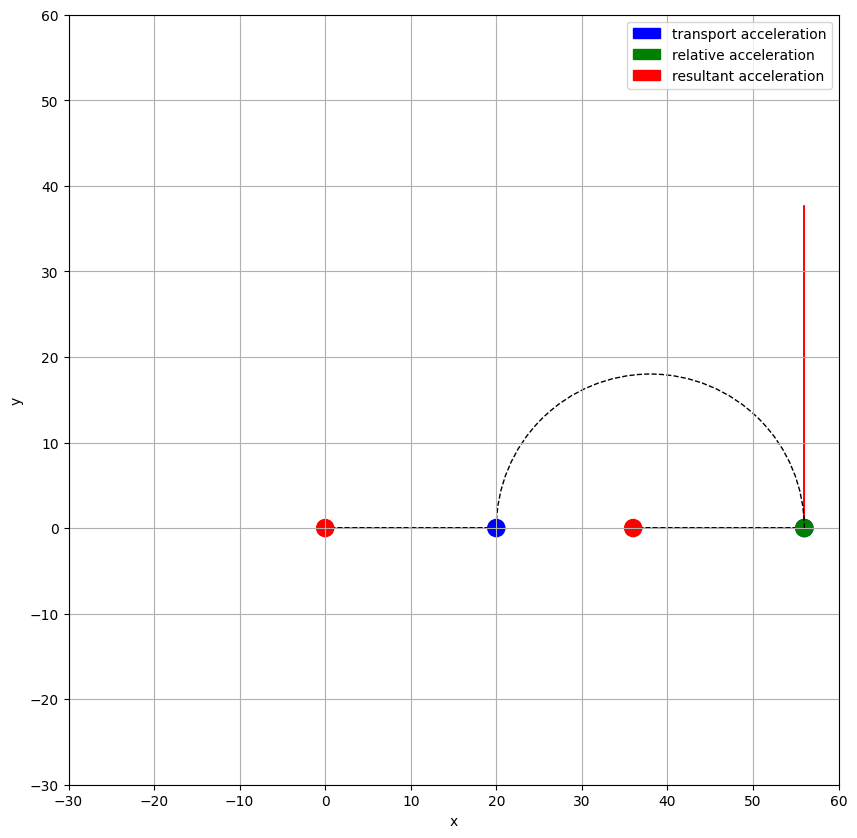

In [27]:
# create animation for t from 0 to t_last

import matplotlib.patches as p

states_anim = [State(t) for t in np.linspace(0, t_last, 100)]
states_anim.extend([states_anim[-1]] * 30)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-30, 60)
ax.set_ylim(-30, 60)
ax.set_aspect("equal")
ax.grid()

actors = {
    "o1": p.Circle(states_anim[0].pos_o1, 1, color="red"),
    "o2": p.Circle(states_anim[0].pos_o2, 1, color="red"),
    "a": p.Circle(states_anim[0].pos_a, 1, color="blue"),
    "o": p.Circle(states_anim[0].pos_o, 1, color="blue"),
    "m": p.Circle(states_anim[0].pos_m, 1, color="green"),
    "D": p.Arc((0, 0), 2 * R, 2 * R, theta1=0, theta2=180, linestyle="--"),
    "O1O": ax.arrow(0, 0, 0, 0, color="black", linestyle="--"),
    "O2A": ax.arrow(0, 0, 0, 0, color="black", linestyle="--"),
    "o_acc": ax.arrow(0, 0, 0, 0, color="blue", label="transport acceleration"),
    "m_rel_acc": ax.arrow(0, 0, 0, 0, color="green", label="relative acceleration"),
    "m_acc": ax.arrow(0, 0, 0, 0, color="red", label="resultant acceleration"),
}
ax.add_patch(actors["o1"])
ax.add_patch(actors["o2"])
ax.add_patch(actors["a"])
ax.add_patch(actors["o"])
ax.add_patch(actors["m"])
ax.add_patch(actors["D"])
ax.legend()


def animate(i):
    if i % 10 == 0:
        print(i)
    state = states_anim[i]
    state.display_acc(actors)


from matplotlib.animation import FuncAnimation

anim = FuncAnimation(fig, animate, frames=len(states_anim), interval=1)
anim.save("task1_acc.gif")
plt.draw()
plt.show()
